# Goal 1: Count how many images are in each class (Normal, Pneumonia) for train, test, and validation sets

In [260]:
import os #Works with files and folers
from pathlib import Path #Makes file paths easier to handle

In [262]:
#Define the base path where your dataset is stored 
base_dir = Path ("../data/chest_xray")
#Point to the subfolders for training, testing, and validation
train_dir = base_dir / "train"
test_dir = base_dir / "test"
val_dir = base_dir / "val"

In [264]:
def count_images(folder: Path) -> tuple[int, int]:
    """
    Counts the number of images in the NORMAL and PNEUMONIA subfolders of a given folder.
    Parameters:
        folder (Path): The root folder containing 'NORMAL' and 'PNEUMONIA' subfolders.
    Returns:
        tuple[int, int]: A tuple containing the counts of images in the NORMAL and PNEUMONIA folders.
    """
    normal = len(list((folder/"NORMAL").glob("*.jpeg")))
    pneumonia = len(list((folder/"PNEUMONIA").glob('*.jpeg')))
    return normal, pneumonia

In [266]:
#Count in each set
train_counts = count_images (train_dir)
test_counts = count_images (test_dir)
val_counts = count_images (val_dir)

In [268]:
# Print a formatted summary table of image counts
print(f"{'Set':<12} {'Normal':>10} {'PNEUMONIA':>12}")
print("-" * 36)
print(f"{'Training':<12} {train_counts[0]:>10} {train_counts[1]:>12}")
print(f"{'Testing':<12} {test_counts[0]:>10} {test_counts[1]:>12}")
print(f"{'Validation':<12} {val_counts[0]:>10} {val_counts[1]:>12}")

Set              Normal    PNEUMONIA
------------------------------------
Training           1341         3875
Testing             234          390
Validation            8            8


# Goal 2: Display a few example images from both classes

In [374]:
import time  # Used to measure execution time of code blocks
import matplotlib.pyplot as plt  # Used for displaying images or plots
import matplotlib.image as mimg  # Helps load and display image files

In [380]:
# Function to display sample images from a specific subset and label
def show_images(subset, label, n):
    """
    Displays 'n' sample images from a specified subset and class label.
    
    Parameters:
        subset (str): One of 'train', 'test', or 'val'. Specifies the data subset to load images from.
        label (str): One of 'NORMAL' or 'PNEUMONIA'. Specifies the class of images to display.
        n (int): The number of images to display.
        
    Returns:
        None: Displays the images but does not return any value.
    """
    folder = base_dir / subset / label  # Construct the path to the folder containing the images
    images = list(folder.glob("*.jpeg"))[:n]  # Get the first 'n' images of the specified type

    plt.figure(figsize=(15, 3))  # Set the figure size (width x height in inches)
    
     # Loop through the images and their indices; 'i' is the index, and 'img_path' is the path to the current image
    for i, img_path in enumerate(images):
        img = mimg.imread(img_path)  # Read the image
        plt.subplot(1, n, i + 1)  # Create 1 row and 'n' columns to display images
        plt.imshow(img, cmap='gray', aspect='auto')  # Display image in grayscale with automatic aspect ratio
        plt.title(f"{subset.upper()} - {label}")  # Set the title with subset and label names
        plt.axis('off')  # Hide axis ticks for a cleaner display
        
    plt.tight_layout()  # Adjust the spacing between images to prevent overlap
    plt.show()  # Display the images

                                                          Showing images for TRAIN - NORMAL                                                           


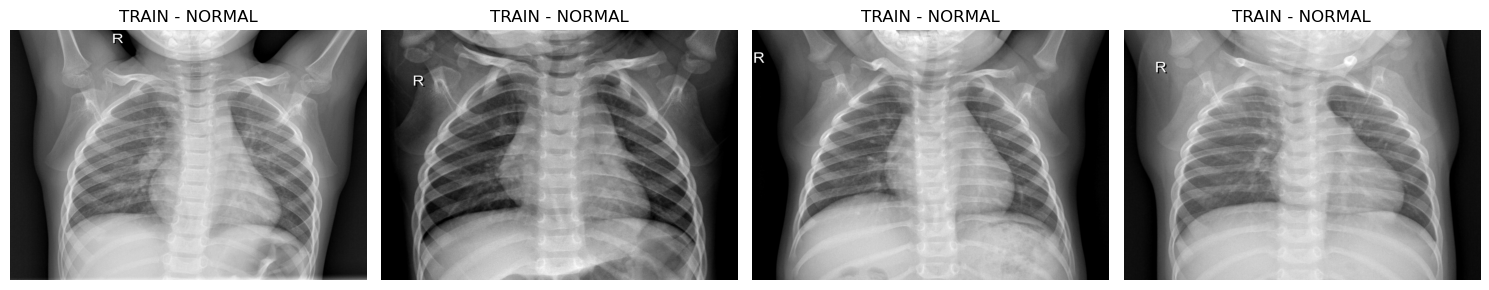

                                                         Showing images for TRAIN - PNEUMONIA                                                         


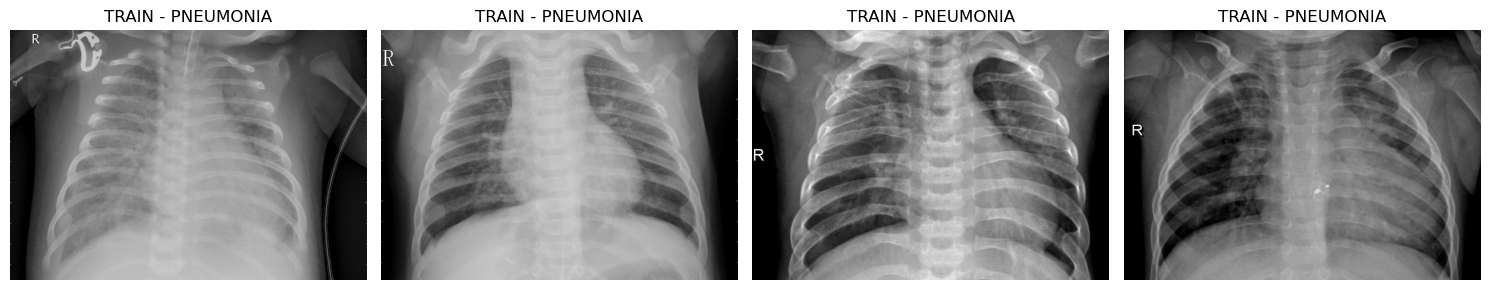

                                                           Showing images for TEST - NORMAL                                                           


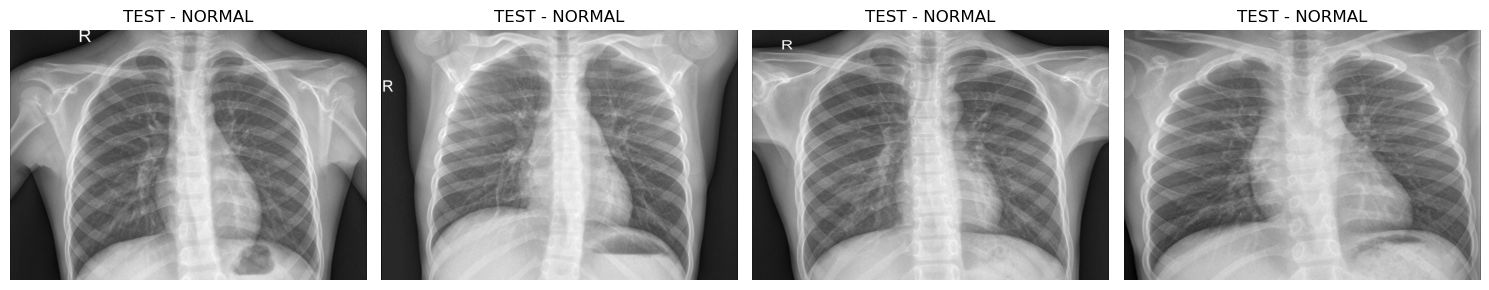

                                                         Showing images for TEST - PNEUMONIA                                                          


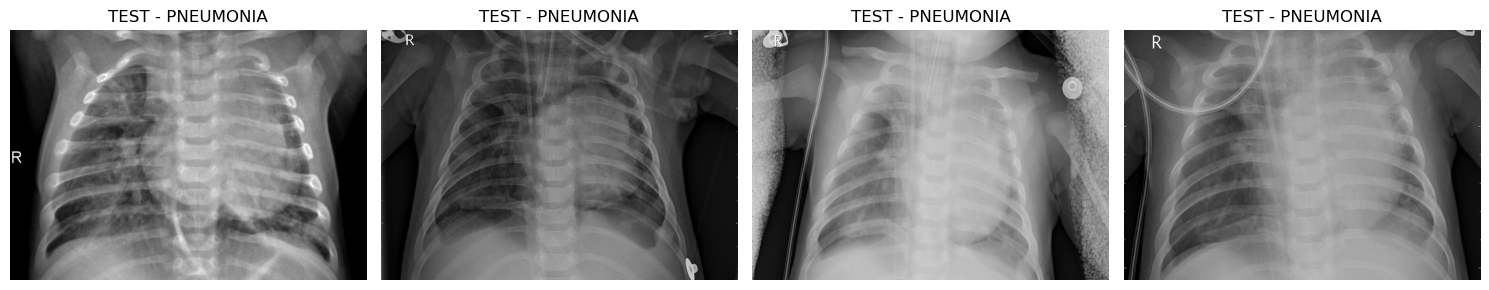

                                                           Showing images for VAL - NORMAL                                                            


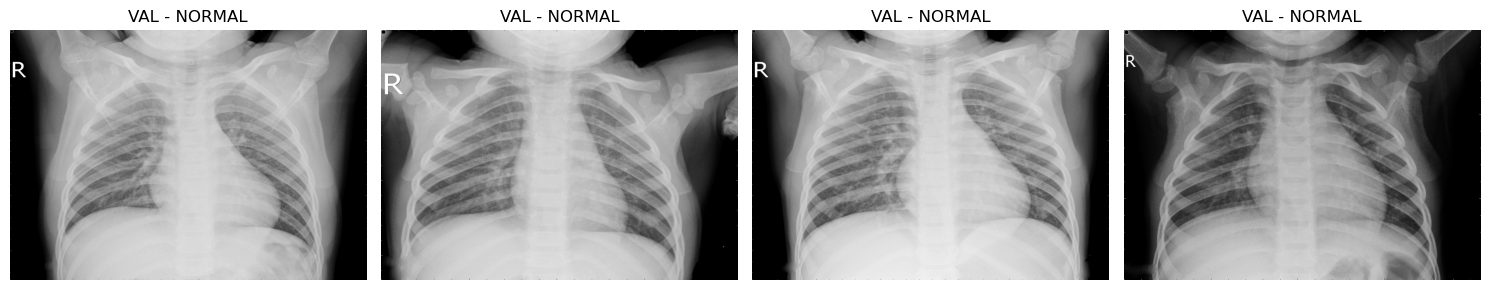

                                                          Showing images for VAL - PNEUMONIA                                                          


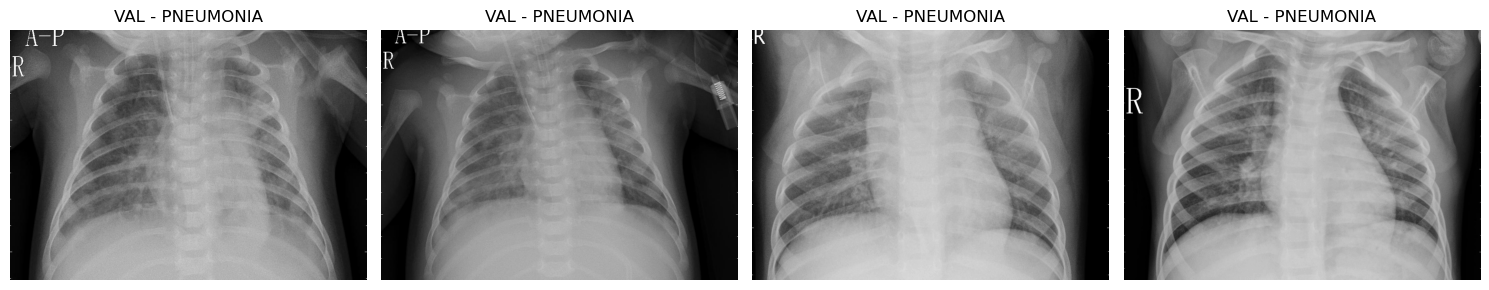


Image display completed in 10.36 seconds


In [384]:
# Start measuring execution time
start = time.time()

# Show images for different subsets and labels
for subset in ["train", "test", "val"]:
    for label in ["NORMAL", "PNEUMONIA"]:
        print(f"Showing images for {subset.upper()} - {label}".center(150))
        show_images(subset=subset, label=label, n=4)

# Stop measuring execution time and display elapsed time
end = time.time()
print(f"\nImage display completed in {end - start:.2f} seconds")